#  Predicting the propensity to pay renewal premium


In [1]:
# Import libraries to use

# Common imports
import numpy as np
import os
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Import functions defined in lr_insurance for this task
from lr_insurance import *

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


## 1. Data Preparing, Clean Data

In [2]:
datapath = os.path.join("dataset", "")

In [3]:
# Load the data
insurance = pd.read_csv(datapath + "train_ZoGVYWq.csv")
display(insurance.T)

,0,1,2,3,4,5,6,7,8,9,...,79843,79844,79845,79846,79847,79848,79849,79850,79851,79852
id,110936,41492,31300,19415,99379,59951,54031,94290,93730,84844,...,84628,11262,25366,104705,91081,48057,59012,77050,67225,71531
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908,...,0.454,0.994,0.825,0.118,0.033,0.425,0.704,0,0.398,0.55
age_in_days,12058,21546,17531,15341,31400,17527,24829,21911,9868,23008,...,25928,20445,14979,22275,18265,23367,19356,23372,22641,15709
Income,355060,315150,84140,250510,198680,282080,118400,180240,92520,107180,...,70800,186830,360060,195070,301540,224550,279150,305020,39330,280140
Count_3-6_months_late,0,0,2,0,0,2,0,1,0,2,...,0,0,2,0,0,1,1,0,0,1
Count_6-12_months_late,0,0,3,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,1,0,0,1
application_underwriting_score,99.02,99.89,98.69,99.57,99.87,99.18,99.05,99.33,99.58,98.91,...,98.19,99.67,98.61,99.25,99.89,98.7,99.42,98.89,98.68,99.84
no_of_premiums_paid,13,21,7,9,12,9,11,3,4,11,...,7,5,10,11,4,19,12,12,8,8
sourcing_channel,C,A,C,A,B,B,B,A,A,A,...,A,A,D,A,A,B,A,A,A,A


In [5]:
print('Number of data samples =', len(insurance))

Number of data samples = 79853


In [6]:
# Check whether there is missing data in each column
print(insurance['id'].count() == insurance['perc_premium_paid_by_cash_credit'].count())
print(insurance['id'].count() == insurance['age_in_days'].count())
print(insurance['id'].count() == insurance['Income'].count())
print(insurance['id'].count() == insurance['Count_3-6_months_late'].count())
print(insurance['id'].count() == insurance['Count_6-12_months_late'].count())
print(insurance['id'].count() == insurance['Count_more_than_12_months_late'].count())
print(insurance['id'].count() == insurance['application_underwriting_score'].count())
print(insurance['id'].count() == insurance['no_of_premiums_paid'].count())
print(insurance['id'].count() == insurance['sourcing_channel'].count())
print(insurance['id'].count() == insurance['residence_area_type'].count())
print(insurance['id'].count() == insurance['premium'].count())
print(insurance['id'].count() == insurance['renewal'].count())

True
True
True
False
False
False
False
True
True
True
True
True


In [7]:
# Take a look at where missing data is
df = insurance.copy()
df[pd.isna(df['Count_3-6_months_late'])].head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
158,73099,1.0,15336,210100,NaN,NaN,NaN,NaN,2,A,Urban,9600,0
1216,81690,1.0,7679,39040,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
1471,49862,1.0,10593,49520,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
3092,59,1.0,17891,90100,NaN,NaN,NaN,NaN,2,A,Urban,5700,1
4177,19184,1.0,18260,40530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0


### Income vs. Renewal

Normally, customers have more income, and they pretend to keep renewing the insurance plan. 

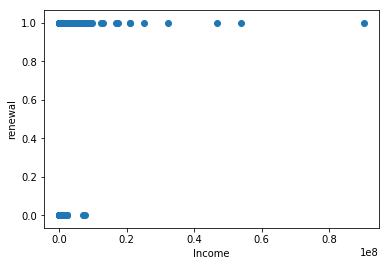

In [8]:
# Plot income vs renewal
plt.scatter(df['Income'], df['renewal'])
plt.xlabel('Income')
plt.ylabel('renewal')
plt.show()

From above figure, it is obvious that the more income the customer has, the more likely to renew the insurance plan. But this relation is not satisfied for those customers with income lower than 1e7. Let's take a look at this range further below:

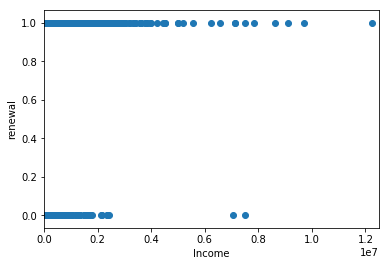

In [9]:
## setting the limits on the x-axis
plt.xlim(0,1.25e7)

# Plot income vs renewal
plt.scatter(df['Income'], df['renewal'])
plt.xlabel('Income')
plt.ylabel('renewal')
plt.show()

It is clear that there are few outliers when income > 0.2e7. Hence, we clean these outliers first.

In [10]:
# Take a look at outliers
outlier1 = df[(df['Income'] > 0.2e7) & (df['renewal'] == 0)]
display(outlier1.T)

,20492,22275,30056,36370,38109,44977,45891
id,15390,89443,92017,14776,110621,73928,60243
perc_premium_paid_by_cash_credit,0.805,0.168,0.855,0.376,0,0.358,0.137
age_in_days,11320,19716,14615,22639,19357,22275,12784
Income,2430110,2117390,2340080,7500070,7038040,2160030,2355150
Count_3-6_months_late,2,0,0,0,4,3,0
Count_6-12_months_late,0,1,0,0,1,1,0
Count_more_than_12_months_late,0,1,0,0,1,0,0
application_underwriting_score,99.89,99.88,99.85,99.85,99.78,99.86,99.85
no_of_premiums_paid,7,6,8,17,19,10,6
sourcing_channel,C,B,C,A,A,B,C


In [11]:
# Remove outliers from dataset
df1 = df.drop([20492, 22275, 30056, 36370, 38109, 44977, 45891])

# Check
check1 = df1[(df1['Income'] > 0.2e7) & (df1['renewal'] == 0)]
check1

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [12]:
display(df1.T)

,0,1,2,3,4,5,6,7,8,9,...,79843,79844,79845,79846,79847,79848,79849,79850,79851,79852
id,110936,41492,31300,19415,99379,59951,54031,94290,93730,84844,...,84628,11262,25366,104705,91081,48057,59012,77050,67225,71531
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908,...,0.454,0.994,0.825,0.118,0.033,0.425,0.704,0,0.398,0.55
age_in_days,12058,21546,17531,15341,31400,17527,24829,21911,9868,23008,...,25928,20445,14979,22275,18265,23367,19356,23372,22641,15709
Income,355060,315150,84140,250510,198680,282080,118400,180240,92520,107180,...,70800,186830,360060,195070,301540,224550,279150,305020,39330,280140
Count_3-6_months_late,0,0,2,0,0,2,0,1,0,2,...,0,0,2,0,0,1,1,0,0,1
Count_6-12_months_late,0,0,3,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,1,0,0,1
application_underwriting_score,99.02,99.89,98.69,99.57,99.87,99.18,99.05,99.33,99.58,98.91,...,98.19,99.67,98.61,99.25,99.89,98.7,99.42,98.89,98.68,99.84
no_of_premiums_paid,13,21,7,9,12,9,11,3,4,11,...,7,5,10,11,4,19,12,12,8,8
sourcing_channel,C,A,C,A,B,B,B,A,A,A,...,A,A,D,A,A,B,A,A,A,A


Since those customers who have income < 0.2e7 have about 50% to renew insurance, it means that there must be other factors to affect their decisions. 

### Premium vs. Renewal

Next, I examine the relation between premium and renewal. Normally, we can expect that people who have lower income pretend not to pay high premium. That is, the higher the ratio between premium and income, the lower posibility to renew the policy.

In [12]:
exam2 = df1.copy()
exam2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [13]:
# Calculate the ration between premium and Income, and add it to dataframe
exam2['ratio'] = exam2['premium']/exam2['Income']
exam2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,ratio
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.009294
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,0.057116
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,0.039220
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,0.038322
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,0.048319


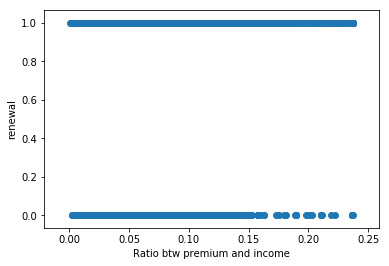

In [14]:
# Plot ratio between premium and income vs renewal
plt.scatter(exam2['ratio'], exam2['renewal'])
plt.xlabel('Ratio btw premium and income')
plt.ylabel('renewal')
plt.show()

### Age in Days vs. Renewal

Overview whether age in days is related to whether customers renew policy or not

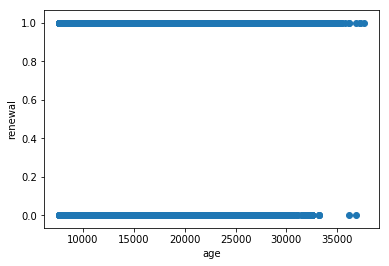

In [15]:
# Plot age vs renewal
plt.scatter(df1['age_in_days'], df1['renewal'])
plt.xlabel('age')
plt.ylabel('renewal')
plt.show()

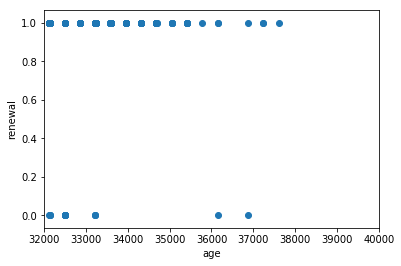

In [16]:
# Enlarge figure for age in days between 30000 and 40000

## setting the limits on the x-axis
plt.xlim(32000,40000)

# Plot income vs renewal
plt.scatter(df1['age_in_days'], df1['renewal'])
plt.xlabel('age')
plt.ylabel('renewal')
plt.show()

From above two figures, one can conclude that customers with the age above 33000 days (90 years) tend to renew the policy. There are some outliers. Let's remove it in the following.

In [17]:
# Take a look at outliers
outlier2 = df1[(df1['age_in_days'] > 33000) & (df1['renewal'] == 0)]
outlier2

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
15949,66865,0.001,36145,195100,0.0,0.0,0.0,NaN,17,A,Urban,9600,0
18360,69596,0.771,33220,71860,5.0,1.0,3.0,99.09,7,A,Urban,3300,0
38401,44175,0.003,36874,86570,2.0,0.0,0.0,NaN,8,A,Rural,7500,0
48536,86086,0.009,33224,625100,0.0,1.0,0.0,99.89,6,A,Rural,26400,0
54566,110380,0.315,33227,500100,1.0,0.0,0.0,98.70,30,A,Urban,32700,0


In [18]:
# Remove outliers from dataset
df1 = df1.drop([15949, 18360, 38401,48536,54566])
print(len(df1))

79841


### Percentage of premium amount paid by cash or credit card vs. Renewal

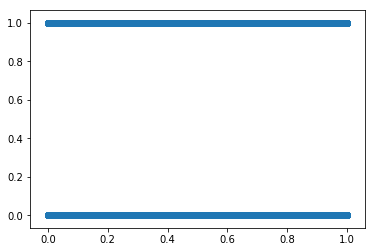

In [19]:
plt.scatter(df1['perc_premium_paid_by_cash_credit'], df1['renewal'])
plt.show()

From above figure, `Percentage of premium amount paid by cash or credit card` seems not directly affecting `renewal`.

### Number of Premium Paid vs. Renewal

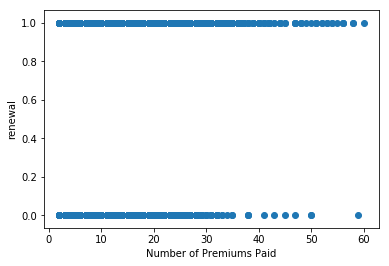

In [20]:
plt.scatter(df1['no_of_premiums_paid'], df1['renewal'])
plt.xlabel('Number of Premiums Paid')
plt.ylabel('renewal')
plt.show()

In [21]:
df1[(df1['no_of_premiums_paid'] > 37) & (df1['renewal'] == 0)]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
9608,12010,0.241,13146,165070,0.0,0.0,0.0,99.47,50,A,Urban,9600,0
16203,78402,0.159,12057,555040,0.0,0.0,0.0,98.28,38,A,Urban,32700,0
39767,89000,0.452,20451,551540,0.0,0.0,0.0,99.00,41,C,Rural,53700,0
45055,16033,0.110,16431,150130,1.0,0.0,0.0,99.57,47,B,Rural,7500,0
48610,6790,0.037,15703,1679090,0.0,0.0,0.0,98.24,43,A,Rural,60000,0
64534,11546,0.230,18257,213050,3.0,0.0,0.0,98.13,45,B,Urban,18000,0
64559,7673,0.435,17896,137530,1.0,0.0,0.0,97.35,38,A,Urban,5400,0
67876,70117,0.051,15337,1264770,0.0,0.0,0.0,99.67,59,C,Urban,60000,0
71025,85613,0.432,16798,247640,0.0,0.0,0.0,98.14,38,A,Urban,13800,0
79337,45508,0.577,16435,426060,0.0,0.0,0.0,99.53,50,A,Urban,20100,0


From above figure, it is clear that those data in above table are outliers since it is reasonable to expect that if one has used the insurance policy for a long time, then it is verly likely to keep using it. Hence, I drop those data below:

In [22]:
df1 = df1.drop([9608, 16203, 39767, 45055, 48610, 64534, 64559, 67876, 71025, 79337])

In [23]:
# Number of rows now
df1['id'].count()

79831

### Sourcing Channel vs. Renewal

In [24]:
Total = df1['id'].count()
A_pos = df1[(df1['sourcing_channel']=='A') & (df1['renewal']==1)]['id'].count()
B_pos = df1[(df1['sourcing_channel']=='B') & (df1['renewal']==1)]['id'].count()
C_pos = df1[(df1['sourcing_channel']=='C') & (df1['renewal']==1)]['id'].count()
D_pos = df1[(df1['sourcing_channel']=='D') & (df1['renewal']==1)]['id'].count()
E_pos = df1[(df1['sourcing_channel']=='E') & (df1['renewal']==1)]['id'].count()
A_neg = df1[(df1['sourcing_channel']=='A') & (df1['renewal']==0)]['id'].count()
B_neg = df1[(df1['sourcing_channel']=='B') & (df1['renewal']==0)]['id'].count()
C_neg = df1[(df1['sourcing_channel']=='C') & (df1['renewal']==0)]['id'].count()
D_neg = df1[(df1['sourcing_channel']=='D') & (df1['renewal']==0)]['id'].count()
E_neg = df1[(df1['sourcing_channel']=='E') & (df1['renewal']==0)]['id'].count()

# Calculate percentage below
print("A & Renewal: {} % A & Not Renewal: {} %".format(A_pos/Total*100, A_neg/Total*100))
print("B & Renewal: {} % B & Not Renewal: {} %".format(B_pos/Total*100, B_neg/Total*100))
print("C & Renewal: {} % C & Not Renewal: {} %".format(C_pos/Total*100, C_neg/Total*100))
print("D & Renewal: {} % D & Not Renewal: {} %".format(D_pos/Total*100, D_neg/Total*100))
print("E & Renewal: {} % E & Not Renewal: {} %".format(E_pos/Total*100, E_neg/Total*100))

A & Renewal: 51.089175884055074 % A & Not Renewal: 2.926181558542421 %
B & Renewal: 19.348373438889656 % B & Not Renewal: 1.3303102804674876 %
C & Renewal: 13.949468251681676 % C & Not Renewal: 1.124876301186256 %
D & Renewal: 8.674575039771518 % D & Not Renewal: 0.7941777003920782 %
E & Renewal: 0.7052398191178865 % E & Not Renewal: 0.0576217258959552 %


To conclude, customers who used sourcing channel A for application are very likely to renew policy. 

In [25]:
# Convert A = +3, B = +2, C = 1, D = -1, E = -2 for later calculation
df2 = df1.copy()
df2['sourcing_channel'] = df2['sourcing_channel'].map({'A':3, 'B':2, 'C':1, 'D':-1, 'E':-2})
df2['sourcing_channel'].values

array([1, 3, 1, ..., 3, 3, 3], dtype=int64)

In [26]:
# Convert Urban = +1 and Rural = -1 in residence_area_type
df2['residence_area_type'] = df2['residence_area_type'].map({'Urban':1, 'Rural':-1 })
df2['residence_area_type'].values

array([ 1,  1, -1, ..., -1, -1,  1], dtype=int64)

### Fill in Missing Data

In [27]:
# Fill in missing data with zeros
df2 = df2.fillna(0)

In [28]:
# Replace 0 in application_underwriting_score by 90 since no applications under the score of 90 are insured
df2 = df2.replace({'application_underwriting_score':0}, {'application_underwriting_score':90.0})

In [146]:
df2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,1,1,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,3,1,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,1,-1,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,3,1,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,2,1,9600,1


## 2. Feature Scaling
<BR>
`featureNormalize(X)` returns a normalized version of `X` where the mean value of each feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when working with learning algorithms.

In [148]:
X = np.c_[df2['perc_premium_paid_by_cash_credit'], df2['age_in_days'], df2['Income'], df2['Count_3-6_months_late'], \
          df2['Count_6-12_months_late'], df2['Count_more_than_12_months_late'], df2['application_underwriting_score'],\
          df2['no_of_premiums_paid'], df2['sourcing_channel'], df2['residence_area_type'], df2['premium']]
y = np.c_[df2['renewal']]
print('size of X:', X.shape, 'size of y:', y.shape)

size of X: (79831, 11) size of y: (79831, 1)


In [149]:
# Set the random seed
random_seed = 50
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=random_seed)

In [150]:
print('size of X_train:', X_train.shape, 'size of X_val:', X_val.shape)

size of X_train: (71847, 11) size of X_val: (7984, 11)


In [151]:
X_copy = X_train.copy()
X_norm_train, mu, sigma = featureNormalize(X_copy)

Note that we still need mu and sigma when we predict probability of renewal for the validation and test dataset.

In [152]:
# Scale validation set
X_norm_val = (X_val - mu)/sigma
m_val = y_val.shape[0]
print(m_val)

7984


## 3. Model Selection
<BR>
In this task, it is a binary classification problem. I am predicting whether custmers will renew their insurance plan by training classifier from training samples. If policy is renewed, then $y = 1$, or $y=0$.
    
In what follows, I implemented **Neural Network** (NN) model with L2 regularization to avoid overfitting. One can achieve this goal by using **sklearn.neural_network.MLPClassifier** in Scikit-learn library. Here is the [reference](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 

For activation function, I implement **rectifying nonlinearity**, known as rectified linear unit or Relu as shown in the following figure.

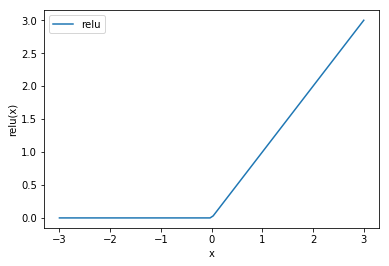

In [153]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.show()

In [154]:
from sklearn.neural_network import MLPClassifier

In [185]:
# Select NN model by using relu activation function
mlp1 = MLPClassifier(solver='adam',activation='relu', alpha=0.1, random_state=21, hidden_layer_sizes=(4,))

# Train the model
mlp1.fit(X_norm_train, y_train)

c:\users\fsh\myenv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=21, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [186]:
print("Accuracy on training set: {:.3f}".format(mlp1.score(X_norm_train, y_train)))
# Measure accuracy by using validation set
print("Accuracy on test set: {:.3f}".format(mlp1.score(X_norm_val, y_val)))

Accuracy on training set: 0.941
Accuracy on test set: 0.937


## 4. Evaluate the Model

I consider ROC-AUC score to evaluate models of consideration.

In [187]:
# Calculate estimated probability from method predict_proba (probability estimates of the positive class)
prob_val1 = mlp1.predict_proba(X_norm_val)[:,1]
prob_val1 = prob_val1.reshape(m_val,1)

In [188]:
# Calculate ROC-AUC score:
roc_auc_score(y_val, prob_val1)

0.8335996716404922

## 5. Prediction 
<BR>
Now I am ready to predict from the test dataset by training model, neural network model with L2 regularization.

### Prepare Test Dataset

In [189]:
# Load the data from test set
insurance_test = pd.read_csv(datapath + "test_66516Ee.csv")
insurance_test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [190]:
m_test = len(insurance_test['id'])
print('Number of data in test set:', m_test)

Number of data in test set: 34224


In [191]:
# Find missing value in test set
df_test = insurance_test.copy()
print(df_test['id'].count() == df_test['perc_premium_paid_by_cash_credit'].count())
print(df_test['id'].count() == df_test['age_in_days'].count())
print(df_test['id'].count() == df_test['Income'].count())
print(df_test['id'].count() == df_test['Count_3-6_months_late'].count())
print(df_test['id'].count() == df_test['Count_6-12_months_late'].count())
print(df_test['id'].count() == df_test['Count_more_than_12_months_late'].count())
print(df_test['id'].count() == df_test['application_underwriting_score'].count())
print(df_test['id'].count() == df_test['no_of_premiums_paid'].count())
print(df_test['id'].count() == df_test['sourcing_channel'].count())
print(df_test['id'].count() == df_test['residence_area_type'].count())
print(df_test['id'].count() == df_test['premium'].count())

True
True
True
False
False
False
False
True
True
True
True


Note that there are missing data in columns: "Count_3-6_months_late", "Count_6-12_months_late", "Count_more_than_12_months_late", and "application_underwriting_score". It is fine since I do not include these features in the training model.

In [192]:
# Convert A = +3, B = +2, C = 1, D = -1, E = -2 for later calculation
df_test['sourcing_channel'] = df_test['sourcing_channel'].map({'A':3, 'B':2, 'C':1, 'D':-1, 'E':-2})
df_test['sourcing_channel'].values

array([3, 3, 2, ..., 2, 3, 3], dtype=int64)

In [193]:
# Convert Urban = +1 and Rural = -1 in residence_area_type
df_test['residence_area_type'] = df_test['residence_area_type'].map({'Urban':1, 'Rural':-1 })
df_test['residence_area_type'].values

array([-1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [194]:
# Fill in missing data with zeros
df_test = df_test.fillna(0)

In [195]:
# Replace 0 in application_underwriting_score by 90 since no applications under the score of 90 are insured
df_test = df_test.replace({'application_underwriting_score':0}, {'application_underwriting_score':90.0})

In [196]:
# X_test
X_test = np.c_[df_test['perc_premium_paid_by_cash_credit'], df_test['age_in_days'], df_test['Income'], df_test['Count_3-6_months_late'], \
          df_test['Count_6-12_months_late'], df_test['Count_more_than_12_months_late'], df_test['application_underwriting_score'],\
          df_test['no_of_premiums_paid'], df_test['sourcing_channel'], df_test['residence_area_type'], df_test['premium']]
print("Size of test set = {}".format(X_test.shape))

# list of id
id_test = np.c_[df_test['id']]
print("Size of id_test = {}".format(id_test.shape))

# premium paid by the policy holder for the policy in consideration in test set
premium_test = np.c_[df_test['premium']]

Size of test set = (34224, 11)
Size of id_test = (34224, 1)


In [197]:
assert(X_test.shape[0] == m_test)
assert(id_test.shape[0] == m_test)
assert(premium_test.shape[0] == m_test)

In [198]:
# Scaling features
X_norm_test = (X_test - mu)/sigma

## Use Trained Model to Predict

In [199]:
# Calculate estimated probability from method predict_proba (probability estimates of the positive class)
prob_test1 = mlp1.predict_proba(X_norm_test)[:,1]
prob_test1 = prob_test1.reshape(m_test,1)

## Maximize the Net Revenue across All Policies
<BR>
The net revenue across all policies will be calculated in the following manner:
$$ \text{Total Net Revenue} = \sum_i \left[ (p_i + \Delta p) \times \text{premium on policy} - \text{Incentives on policy} \right]$$,
where
    
- $p_i$ is the renewal probability predicted using a benchmark model by the insurance company
- $\Delta p$ (% Improvement in renewal probability * $p_i$) is the improvement in renewal probability calculated from the agent efforts in hours as shown later
- "Premium on policy" is the premium paid by the policy holder for the policy in consideration
- "Incentive on policy" is the incentive given to the agent for increasing the chance of renewal for each policy

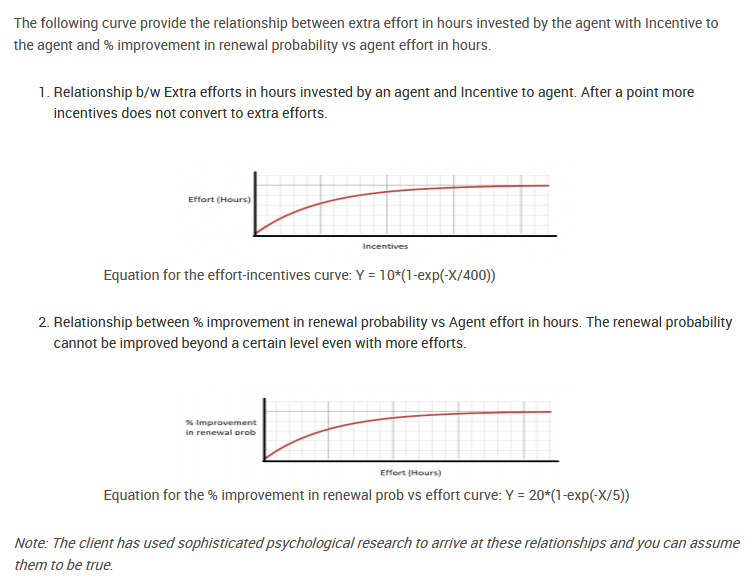

In [200]:
from IPython.display import Image
Image(filename='picture/Relationships.PNG')

The above figure is from [Problem Statement for McKinsey Analytics Online Hackathon](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon-4/?utm_source=sendinblue&utm_campaign=Events_in_July_2018&utm_medium=email). 

From the figure, we know that
$$ Y = 10 \times \left[1- \exp(-X/400)\right]$$
where $Y$ is agent effort in unit of hours and $X$ is incentives. Also, the relationship between % improvent in renewal probability and Agent effort in hours is given by
$$ Y = 20 \times \left[1-\exp(-X/5)\right]$$
where $X$ is agent effort and $Y$ is % improvent in renewal probability.

With these two relationships, one can find the incentives such that total revenue is maximized.

In [201]:
def revenue(p, p_imp, premium, incentives):
    """
    revenue: Calculate the net revenue across all policies
    Input:
       p: probability predicted by model
       p_imp: % improvement calculated by improvement(x) function in lr_insurance package
       premium: premium paid by the policy holder for the policy in consideration
       incentives: incentive given to the agent for increasing the chance of renewal
       Note that p_imp and incentives are vectors.
    """
    rev = np.zeros(p_imp.shape)
    tot = np.zeros( (p.shape[0],p_imp.shape[0]) ) 
    tot = (p + p_imp)* premium - incentives
    rev = np.sum(tot, axis=0)
    return rev

In [202]:
incentive = np.linspace(1000.0, 10000.0, num=1000)

# Calculate agent effort in hours by effort(x)
eff = effort(incentive)

# Calculate percentage of improvement in renewal probability by improvement(x)
p_imp = improvement(eff)

In [203]:
# Calculate total revenue for test set
rev_tot_test1 = revenue(prob_test1, p_imp, premium_test , incentive)

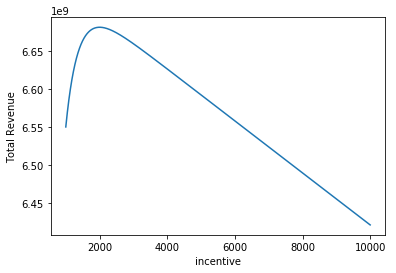

In [204]:
# Plot Total Revenue vs. incentive
plt.plot(incentive, rev_tot_test1)
plt.xlabel('incentive')
plt.ylabel('Total Revenue')
plt.show()

In [205]:
# The value of incentive corresponding to the maximum of total revenue
incentive[np.argmax(rev_tot_test1)]

2000.0

Hence, **for test set the total revenue has a maximum is still about incentive equal to 2000.0**.

## 7. Output Prediction

In [206]:
incentive_best = np.ones((m_test,1))*2000
print(incentive_best.shape)
incentive_best

(34224, 1)


array([[2000.],
       [2000.],
       [2000.],
       ...,
       [2000.],
       [2000.],
       [2000.]])

In [207]:
results1 = np.hstack([id_test,prob_test1, incentive_best])

In [208]:
result_df1 = pd.DataFrame(results1, columns=['id','renewal', 'incentives'])
result_df1['id'] = result_df1['id'].astype('int64')

# Set the DataFrame index (row labels) by using existing column
result_df1 = result_df1.set_index('id')
result_df1.head(20)

,renewal,incentives
id,,
649,0.993327,2000.0
81136,0.983021,2000.0
70762,0.891131,2000.0
53935,0.976785,2000.0
15476,0.952547,2000.0
64797,0.984606,2000.0
67412,0.727925,2000.0
44241,0.811172,2000.0
5069,0.991525,2000.0


In [209]:
result_df1.to_csv("HHF_submissionNN12.csv")

## 8. Solution Checker

Overall Ranking at the leaderboard would be done using the following equation:

 
$$ \text{Combined Score} = w_1* \text{AUC-ROC value} + w_2* (\text{net revenue collected from all policies})*\lambda$$

Where -

$w_1$ = 0.7

$w_2$ = 0.3

$\lambda$ is a normalizing factor

Score I obtained is 0.69646497948321 for public test dataset